#                                        Лабораторна робота №3

 ## Структури для роботи з великими обсягами даних в Python

***Професійний Data scientist*** має вміти працювати з різнотипними датасетами, обробляти їх, візуалізувати та знаходити закономірності. Тому першим кроком є вибір датасету. Пропонуємо для подальших робіт вибрати
датасет, що вам сподобається, із архіву https://archive.ics.uci.edu/ml/index.php/.
Датасет має відповідати таким вимогам:
 * Data Set Characteristics: Multivariate
 * Attribute Characteristics: Categorical, Integer, Real
 * Number of Attributes: at least 2 integers/real
 * Missing Values? YES!!!!!

Виконати всі завдання, використовуючи як *numpy array*, так і *dataframe*

**1. Поборемося із зниклими даними ↓**

In [85]:
from urllib.request import urlopen
import pandas as pd
import numpy as np


url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cylinder-bands/bands.data'

# Відкриття WEB-сторінки можна зробити наступним чином:
webpage = urlopen(url)
text = webpage.read()

# Створити новий файл за допомоги функції open
out = open('bands.data', 'wb')
# Після відкриття у змінній text міститься текст із WEB-сторінки, який тепер можна записати у файл
out.write(text)
out.close()


# Визначення заголовків для стовців датафрейму
headers = ['Timestamp', 'Cylinder number', 'Customer', 'Job number', 'Grain screened', 'Ink color', 'Proof on ink',
           'Blade mfg', 'Cylinder division', 'Paper type', 'Ink type', 'Direct steam', 'Solvent type',
           'Type on cylinder', 'Press type', 'Press', 'Unit number', 'Cylinder size', 'Paper mill location',
           'Plating tank', 'Proof cut', 'Viscosity', 'Caliper', 'Ink temperature', 'Humifity', 'Roughness',
           'Blade pressure', 'Varnish pct', 'Press speed', 'Ink pct', 'Solvent pct', 'ESA Voltage', 'ESA Amperage',
           'Wax', 'Hardener', 'Roller durometer', 'Current density', 'Anode space ratio', 'Chrome content', 'Band type']
# Відкриття файлу та його запис у датафрейм
df = pd.read_csv('./bands.data', sep=',', header=1, names=headers)

# Відкинемо всі None (Порожні значення). При цьому враховуємо, що None у файлі позначаються як '?'
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

df

,Timestamp,Cylinder number,Customer,Job number,Grain screened,Ink color,Proof on ink,Blade mfg,Cylinder division,Paper type,...,Solvent pct,ESA Voltage,ESA Amperage,Wax,Hardener,Roller durometer,Current density,Anode space ratio,Chrome content,Band type
1,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,38.8,0,0,2.5,1.3,40,40,108.06,100,noband
3,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,37.6,5,0,2.5,0.8,40,40,103.87,100,noband
4,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,0.6,30,40,106.67,100,noband
5,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,6,0,2.5,1.1,30,40,106.67,100,noband
6,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,39.8,1.5,0,3,1,40,40,103.22,100,band
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,19901211,X242,AMES,34590,NO,KEY,YES,BENTON,GALLATIN,COATED,...,41.2,8,0,3,1,33,40,106.45,100,noband
424,19901214,X108,ECKERDS,34693,NO,KEY,YES,BENTON,GALLATIN,COATED,...,37.5,1,0,2.5,1.5,30,40,106.45,100,noband
425,19901218,X80,ECKERDS,34694,NO,KEY,YES,BENTON,GALLATIN,COATED,...,39.5,4.5,0,1.9,1.3,30,40,114.28,100,noband
426,19901218,F482,DOWNS,35525,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,36.1,4,0,3,1,40,40,117.85,100,noband


**2.1. Пронормуємо всі float values із вибраного датасету ↓**

In [86]:
float_columns = ['Proof cut', 'Viscosity', 'Caliper', 'Ink temperature', 'Humifity', 'Roughness',
                 'Blade pressure', 'Varnish pct', 'Press speed', 'Ink pct', 'Solvent pct', 'ESA Voltage', 'ESA Amperage',
                 'Wax', 'Hardener', 'Roller durometer', 'Current density', 'Anode space ratio', 'Chrome content']

df_copy = df.copy()
for header in float_columns:
    # Змінимо тип даних потрібних нам стовпців на числовий 
    df_copy[header] = pd.to_numeric(df_copy[header], errors='coerce')

norm_data = df_copy.copy()
for column in float_columns: 
    # Пронормуємо відповідні номерні значення у датафреймі
    norm_data[column] = (norm_data[column] - (norm_data[column].min())) / (norm_data[column].max() - (norm_data[column].min()))

norm_data.dropna(axis=1)   

,Timestamp,Cylinder number,Customer,Job number,Grain screened,Ink color,Proof on ink,Blade mfg,Cylinder division,Paper type,...,Solvent pct,ESA Voltage,ESA Amperage,Wax,Hardener,Roller durometer,Current density,Anode space ratio,Chrome content,Band type
1,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.527508,0.00000,0.0,0.806452,0.433333,0.545455,0.666667,0.648474,1.0,noband
3,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.488673,0.31250,0.0,0.806452,0.266667,0.545455,0.666667,0.498025,1.0,noband
4,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.485437,0.37500,0.0,0.806452,0.200000,0.090909,0.666667,0.598564,1.0,noband
5,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.485437,0.37500,0.0,0.806452,0.366667,0.090909,0.666667,0.598564,1.0,noband
6,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.559871,0.09375,0.0,0.967742,0.333333,0.545455,0.666667,0.474686,1.0,band
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,19901211,X242,AMES,34590,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.605178,0.50000,0.0,0.967742,0.333333,0.227273,0.666667,0.590664,1.0,noband
424,19901214,X108,ECKERDS,34693,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.485437,0.06250,0.0,0.806452,0.500000,0.090909,0.666667,0.590664,1.0,noband
425,19901218,X80,ECKERDS,34694,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.550162,0.28125,0.0,0.612903,0.433333,0.090909,0.666667,0.871813,1.0,noband
426,19901218,F482,DOWNS,35525,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.440129,0.25000,0.0,0.967742,0.333333,0.545455,0.666667,1.000000,1.0,noband


**2.2. Стандартизуємо дані ↓**

In [87]:
standart_data = df_copy.copy()
for column in float_columns:
    standart_data[column] = (standart_data[column] - standart_data[column].mean()) / standart_data[column].std()
    
standart_data.dropna(axis=1)

,Timestamp,Cylinder number,Customer,Job number,Grain screened,Ink color,Proof on ink,Blade mfg,Cylinder division,Paper type,...,Solvent pct,ESA Voltage,ESA Amperage,Wax,Hardener,Roller durometer,Current density,Anode space ratio,Chrome content,Band type
1,19910104,T133,MASSEY,39039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.136885,-0.558834,-0.065003,0.140443,1.016071,1.213672,0.462793,1.062938,0.221925,noband
3,19910104,T218,MASSEY,38039,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,-0.191972,1.289437,-0.065003,0.140443,-0.516364,1.213672,0.462793,0.215187,0.221925,noband
4,19910111,X249,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,-0.219377,1.659092,-0.065003,0.140443,-1.129338,-1.071276,0.462793,0.781704,0.221925,noband
5,19910111,X788,ROSES,35751,NO,KEY,YES,BENTON,GALLATIN,COATED,...,-0.219377,1.659092,-0.065003,0.140443,0.403097,-1.071276,0.462793,0.781704,0.221925,noband
6,19910112,M372,MODMAT,47201,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,0.410933,-0.004353,-0.065003,1.056810,0.096610,1.213672,0.462793,0.083675,0.221925,band
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,19901211,X242,AMES,34590,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.794599,2.398400,-0.065003,1.056810,0.096610,-0.385792,0.462793,0.737192,0.221925,noband
424,19901214,X108,ECKERDS,34693,NO,KEY,YES,BENTON,GALLATIN,COATED,...,-0.219377,-0.189180,-0.065003,0.140443,1.629046,-1.071276,0.462793,0.737192,0.221925,noband
425,19901218,X80,ECKERDS,34694,NO,KEY,YES,BENTON,GALLATIN,COATED,...,0.328718,1.104610,-0.065003,-0.959197,1.016071,-1.071276,0.462793,2.321414,0.221925,noband
426,19901218,F482,DOWNS,35525,YES,KEY,YES,BENTON,GALLATIN,UNCOATED,...,-0.603044,0.919783,-0.065003,1.056810,0.096610,1.213672,0.462793,3.043722,0.221925,noband


**3. Збудуємо гістограму по одному із атрибутів, що буде показувати на кількість елементів, що знаходяться у 10 діапазонах, які ми задамо ↓**

<AxesSubplot:title={'center':'Number of customers of the company'}, xlabel='Customer', ylabel='Count'>

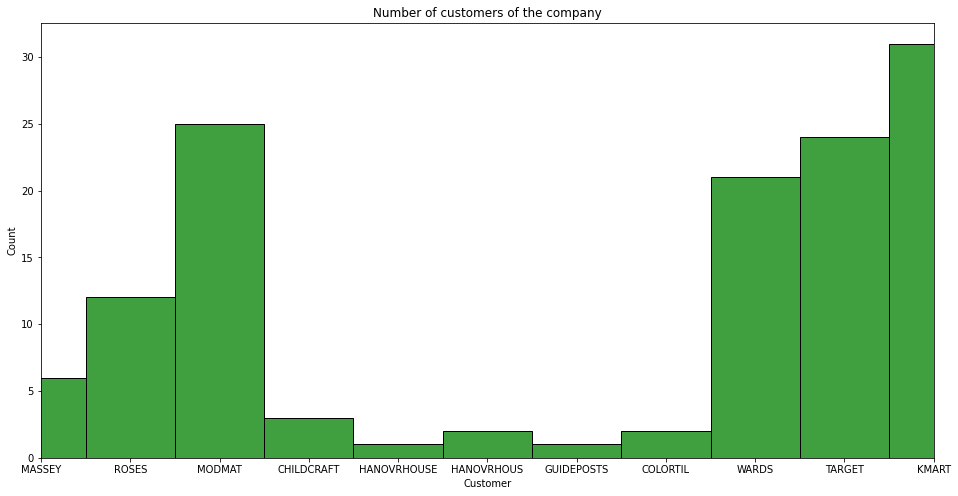

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.title("Number of customers of the company")

# Задамо діапазон із десяти різних замовників
plt.xlim(0, 10)
# Значення stat='count' вказує, що зробити підрахунок елементів
sns.histplot(df['Customer'], stat='count', color='green')



**4. Побудуємо графік залежності одного integer/real атрибута від іншого ↓**

<AxesSubplot:title={'center':'Relation between Varnish pct and Solvent pct'}, xlabel='Varnish pct', ylabel='Solvent pct'>

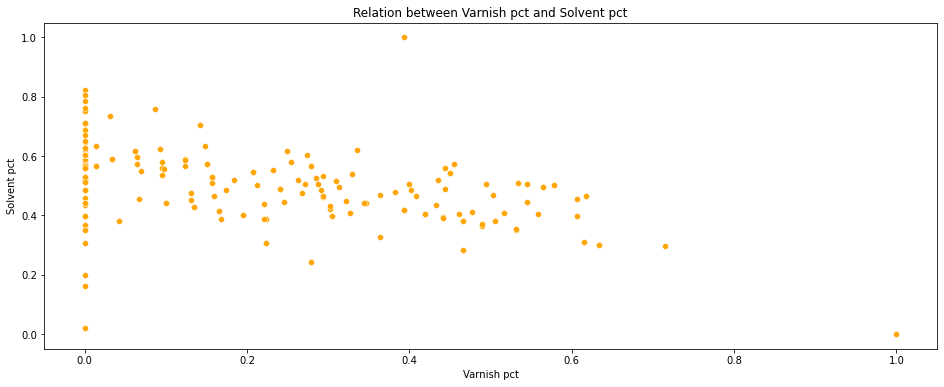

In [89]:
plt.figure(figsize=(16, 6))
plt.title("Relation between Varnish pct and Solvent pct")

# Щоб показати залежність атрибутів, будемо використовувати пронормовані елементи
sns.scatterplot(x=norm_data['Varnish pct'], y=norm_data['Solvent pct'], color = 'orange')

**5. Підрахуємо коефіцієнт Пірсона та Спірсона для двох integer/real атрибутів ↓**

In [90]:
from scipy import stats
x = df['Viscosity'].astype('float')
y = df['Solvent pct'].astype('float')

pearson = stats.pearsonr(x, y)
print(f"PearsonResult = {pearson} \n")

spearman = stats.spearmanr(x, y)
print(spearman)

PearsonResult = (-0.0005117874538250466, 0.9932468939778661) 

SpearmanrResult(correlation=0.008626260535667703, pvalue=0.8865567731077645)


**6. Проведемо One Hot Encoding категоріального string атрибуту ↓**

In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


data = df['Paper mill location'].str.upper()
values = np.array(data)
print("Розташування паперової фабрики: \n", np.unique(values))

# Label Encoder
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)
print("\nInteger Encoding: \n", integer_encoded)


# Reshaping for OneHotEncoder
integer_encoded_reshape = integer_encoded.reshape(len(integer_encoded), 1)

# One Hot Encoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded_reshape)
print("\nOne Hot Encoding: \n", one_hot_encoded)

Розташування паперової фабрики: 
 ['CANADIAN' 'MIDEUROPEAN' 'NORTHUS' 'SCANDANAVIAN' 'SOUTHUS']

Integer Encoding: 
 [2 2 0 0 2 2 2 2 2 2 2 0 0 0 0 3 3 3 3 0 2 2 2 2 2 0 0 2 2 0 0 3 2 2 0 0 0
 2 2 2 4 4 4 4 0 2 2 0 2 3 0 2 0 2 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 2 2 2
 2 0 0 0 0 2 2 2 2 0 0 3 3 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 2 2 0 2 2 2 0 0
 2 2 2 0 0 0 2 2 2 0 2 2 2 0 0 0 0 2 2 2 2 0 0 2 2 0 0 0 0 0 0 0 0 2 2 2 2
 2 2 0 2 2 2 2 0 0 0 2 2 2 2 2 0 0 0 0 0 2 2 2 2 2 2 2 1 1 0 0 0 0 0 2 2 0
 0 0 0 2 2 2 2 2 2 0 2 2 2 1 0 0 1 1 2 2 1 1 1 0 2 2 2 2 0 0 0 2 2 2 2 0 2
 2 0 2 2 0 2 0 2 2 2 2 2 0 0 0 0 2 2 0 0 0 2 2 2 2 2 2 1 1 1 0 2 2 2 2 0 2
 0 0 0 2 2 2 2 2 0 2 0 0 0 0 0 2 2]

One Hot Encoding: 
 [[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]]


**7. Проведемо візуалізацію багатовимірних даних ↓**

###### Visualizing data in One Dimension (1D)

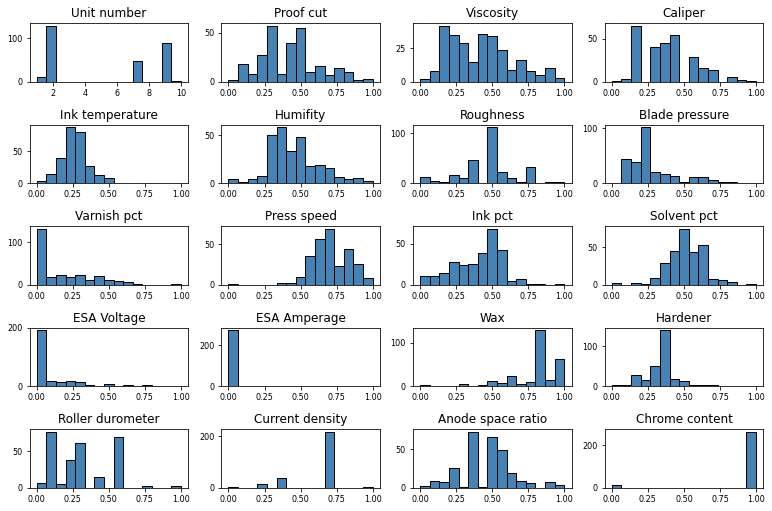

In [92]:
# Several histograms from dataframe attributes

norm_data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0, 
        xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.8, 1.8))

###### Visualizing data in One Dimension (2D)

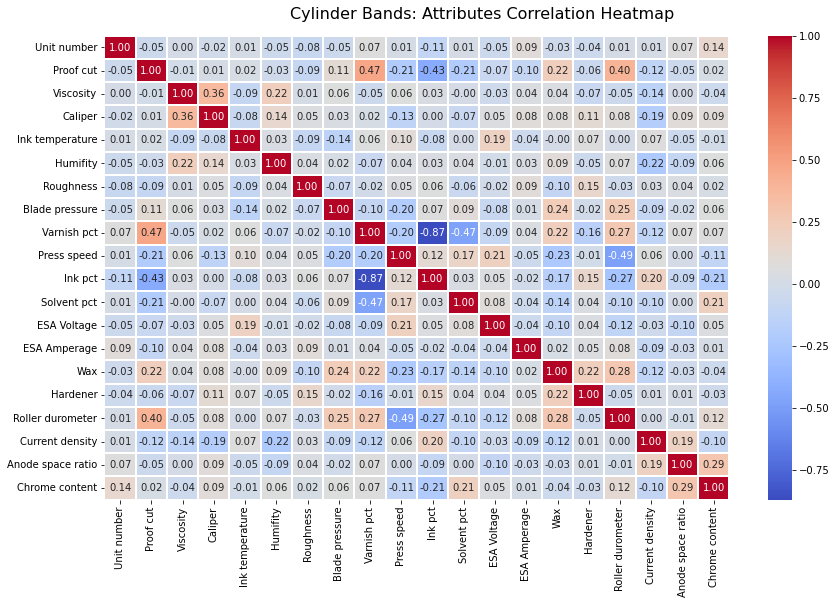

In [93]:
# Visualizing data in One Dimension (2D)
# Correlation Matrix Heatmap

fm, ax = plt.subplots(figsize=(14, 8))
corr = norm_data.corr()
hm = sns.heatmap(round(corr, 2), annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=.05)
fm.subplots_adjust(top=0.93)
title = fm.suptitle('Cylinder Bands: Attributes Correlation Heatmap', fontsize=16)


Text(0, 0.5, 'Grain screened')

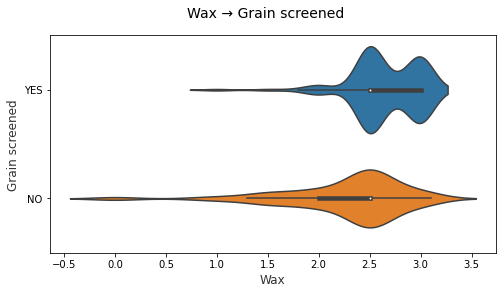

In [94]:
# Violin Plots

f, (ax) = plt.subplots(1, 1, figsize=(8, 4))
f.suptitle('Wax → Grain screened', fontsize=14)

sns.violinplot(x='Wax', y='Grain screened', data=df_copy, ax=ax)
ax.set_xlabel('Wax', size=12, alpha=0.8)
ax.set_ylabel('Grain screened', size=12, alpha=0.8)


###### Visualizing data in One Dimension (3D)

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


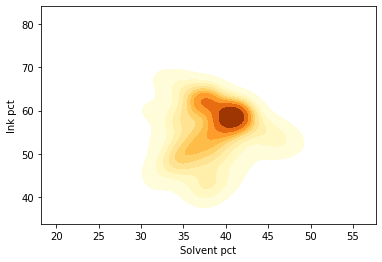

In [95]:
# Leveraging the concepts of hue for categorical dimension
ax = sns.kdeplot(df_copy['Solvent pct'], df_copy['Ink pct'],
                  cmap="YlOrBr", shade=True, shade_lowest=False)

Text(0.5, 0, 'Solvent pct')

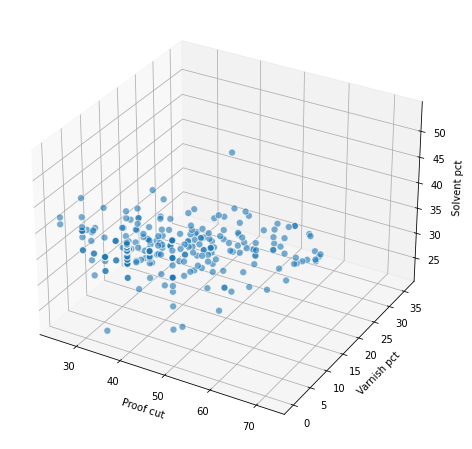

In [97]:
# Visualizing 3-D numeric data with Scatter Plots

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

xs = df_copy['Proof cut']
ys = df_copy['Varnish pct']
zs = df_copy['Solvent pct']

ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

 
ax.set_xlabel('Proof cut')
ax.set_ylabel('Varnish pct')
ax.set_zlabel('Solvent pct')

-------------------------------------------------------------------------------------------------------------------------------

<img src="https://swapps.com/wp-content/uploads/2019/01/speed-up-experiments-with-jupyter.jpg" width="1060" height="300"/>